In [1]:
import seaborn as sns
import matplotlib as plt
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as mplt
import plotly as pt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "colab"
import IPython
from plotly.offline import init_notebook_mode
from plotly.offline import iplot

# **Gun violence data analysis**

## **1. Pre data analysis.**

Loading data and converting to a dataframe.

In [6]:
data = pd.read_csv("/content/Project11_gun_violence_data.csv", low_memory=False)

In [5]:
dataframe = pd.DataFrame(data)
dataframe.head()

incident_id        date           state city_or_county  \
0       461105  2013-01-01    Pennsylvania     Mckeesport   
1       460726  2013-01-01      California      Hawthorne   
2       478855  2013-01-01            Ohio         Lorain   
3       478925  2013-01-05        Colorado         Aurora   
4       478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.dailybulletin.com/article/zz/201301...   
2  http://chronicle.northcoastnow.com/2013/02/14/...   
3  http://www.dailydemocrat.com/20130106/aurora-s...   
4  http://www.journalnow.com/news/local/article_d...   

   incident_url_fields_missing  ...                    participant_age  \
0                        False  ...                              0::20   
1                        False  ...                              0::20   
2                        False  ...  0::25||1::31||2::33||3::34||4::33   
3                        False  ...         0::29||1::33||2::56||3::33   
4                        False  ...         0::18||1::46||2::14||3::47   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender  \
0         0::Male||1::Male||3::Male||4::Female   
1                                      0::Male   
2  0::Male||1::Male||2::Male||3::Male||4::Male   
3         0::Female||1::Male||2::Male||3::Male   
4       0::Female||1::Male||2::Male||3::Female   

                                    participant_name  \
0                                     0::Julian Sims   
1                                  0::Bernard Gillis   
2  0::Damien Bell||1::Desmen Noble||2::Herman Sea...   
3  0::Stacie Philbrook||1::Christopher Ratliffe||...   
4  0::Danielle Imani Jameison||1::Maurice Eugene ...   

   participant_relationship  \
0                       NaN   
1                       NaN   
2                       NaN   
3                       NaN   
4                 3::Family   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...   
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...   

                                             sources state_house_district  \
0  http://pittsburgh.cbslocal.com/2013/01/01/4-pe...                  NaN   
1  http://losangeles.cbslocal.com/2013/01/01/man-...                 62.0   
2  http://www.morningjournal.com/ge

**Getting to know basic info about the dataframe**

In [7]:
# data info

dataframe.info()

# data description

dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   incident_id                  239677 non-null  int64  
 1   date                         239677 non-null  object 
 2   state                        239677 non-null  object 
 3   city_or_county               239677 non-null  object 
 4   address                      223180 non-null  object 
 5   n_killed                     239677 non-null  int64  
 6   n_injured                    239677 non-null  int64  
 7   incident_url                 239677 non-null  object 
 8   source_url                   239209 non-null  object 
 9   incident_url_fields_missing  239677 non-null  bool   
 10  congressional_district       227733 non-null  float64
 11  gun_stolen                   140179 non-null  object 
 12  gun_type                     140226 non-null  object 
 13 

incident_id       n_killed      n_injured  congressional_district  \
count  2.396770e+05  239677.000000  239677.000000           227733.000000   
mean   5.593343e+05       0.252290       0.494007                8.001265   
std    2.931287e+05       0.521779       0.729952                8.480835   
min    9.211400e+04       0.000000       0.000000                0.000000   
25%    3.085450e+05       0.000000       0.000000                2.000000   
50%    5.435870e+05       0.000000       0.000000                5.000000   
75%    8.172280e+05       0.000000       1.000000               10.000000   
max    1.083472e+06      50.000000      53.000000               53.000000   

            latitude      longitude  n_guns_involved  state_house_district  \
count  231754.000000  231754.000000    140226.000000         200905.000000   
mean       37.546598     -89.338348         1.372442             55.447132   
std         5.130763      14.359546         4.678202             42.048117   
min        19.111400    -171.429000         1.000000              1.000000   
25%        33.903400     -94.158725         1.000000             21.000000   
50%        38.570600     -86.249600         1.000000             47.000000   
75%        41.437375     -80.048625         1.000000             84.000000   
max        71.336800      97.433100       400.000000            901.000000   

       state_senate_district  
count           207342.00000  
mean                20.47711  
std                 14.20456  
min                  1.00000  
25%                  9.00000  
50%                 19.00000  
75%                 30.00000  
max                 94.00000

**Basic data visualization of all columns combined. For this we are going to use seaborn library**

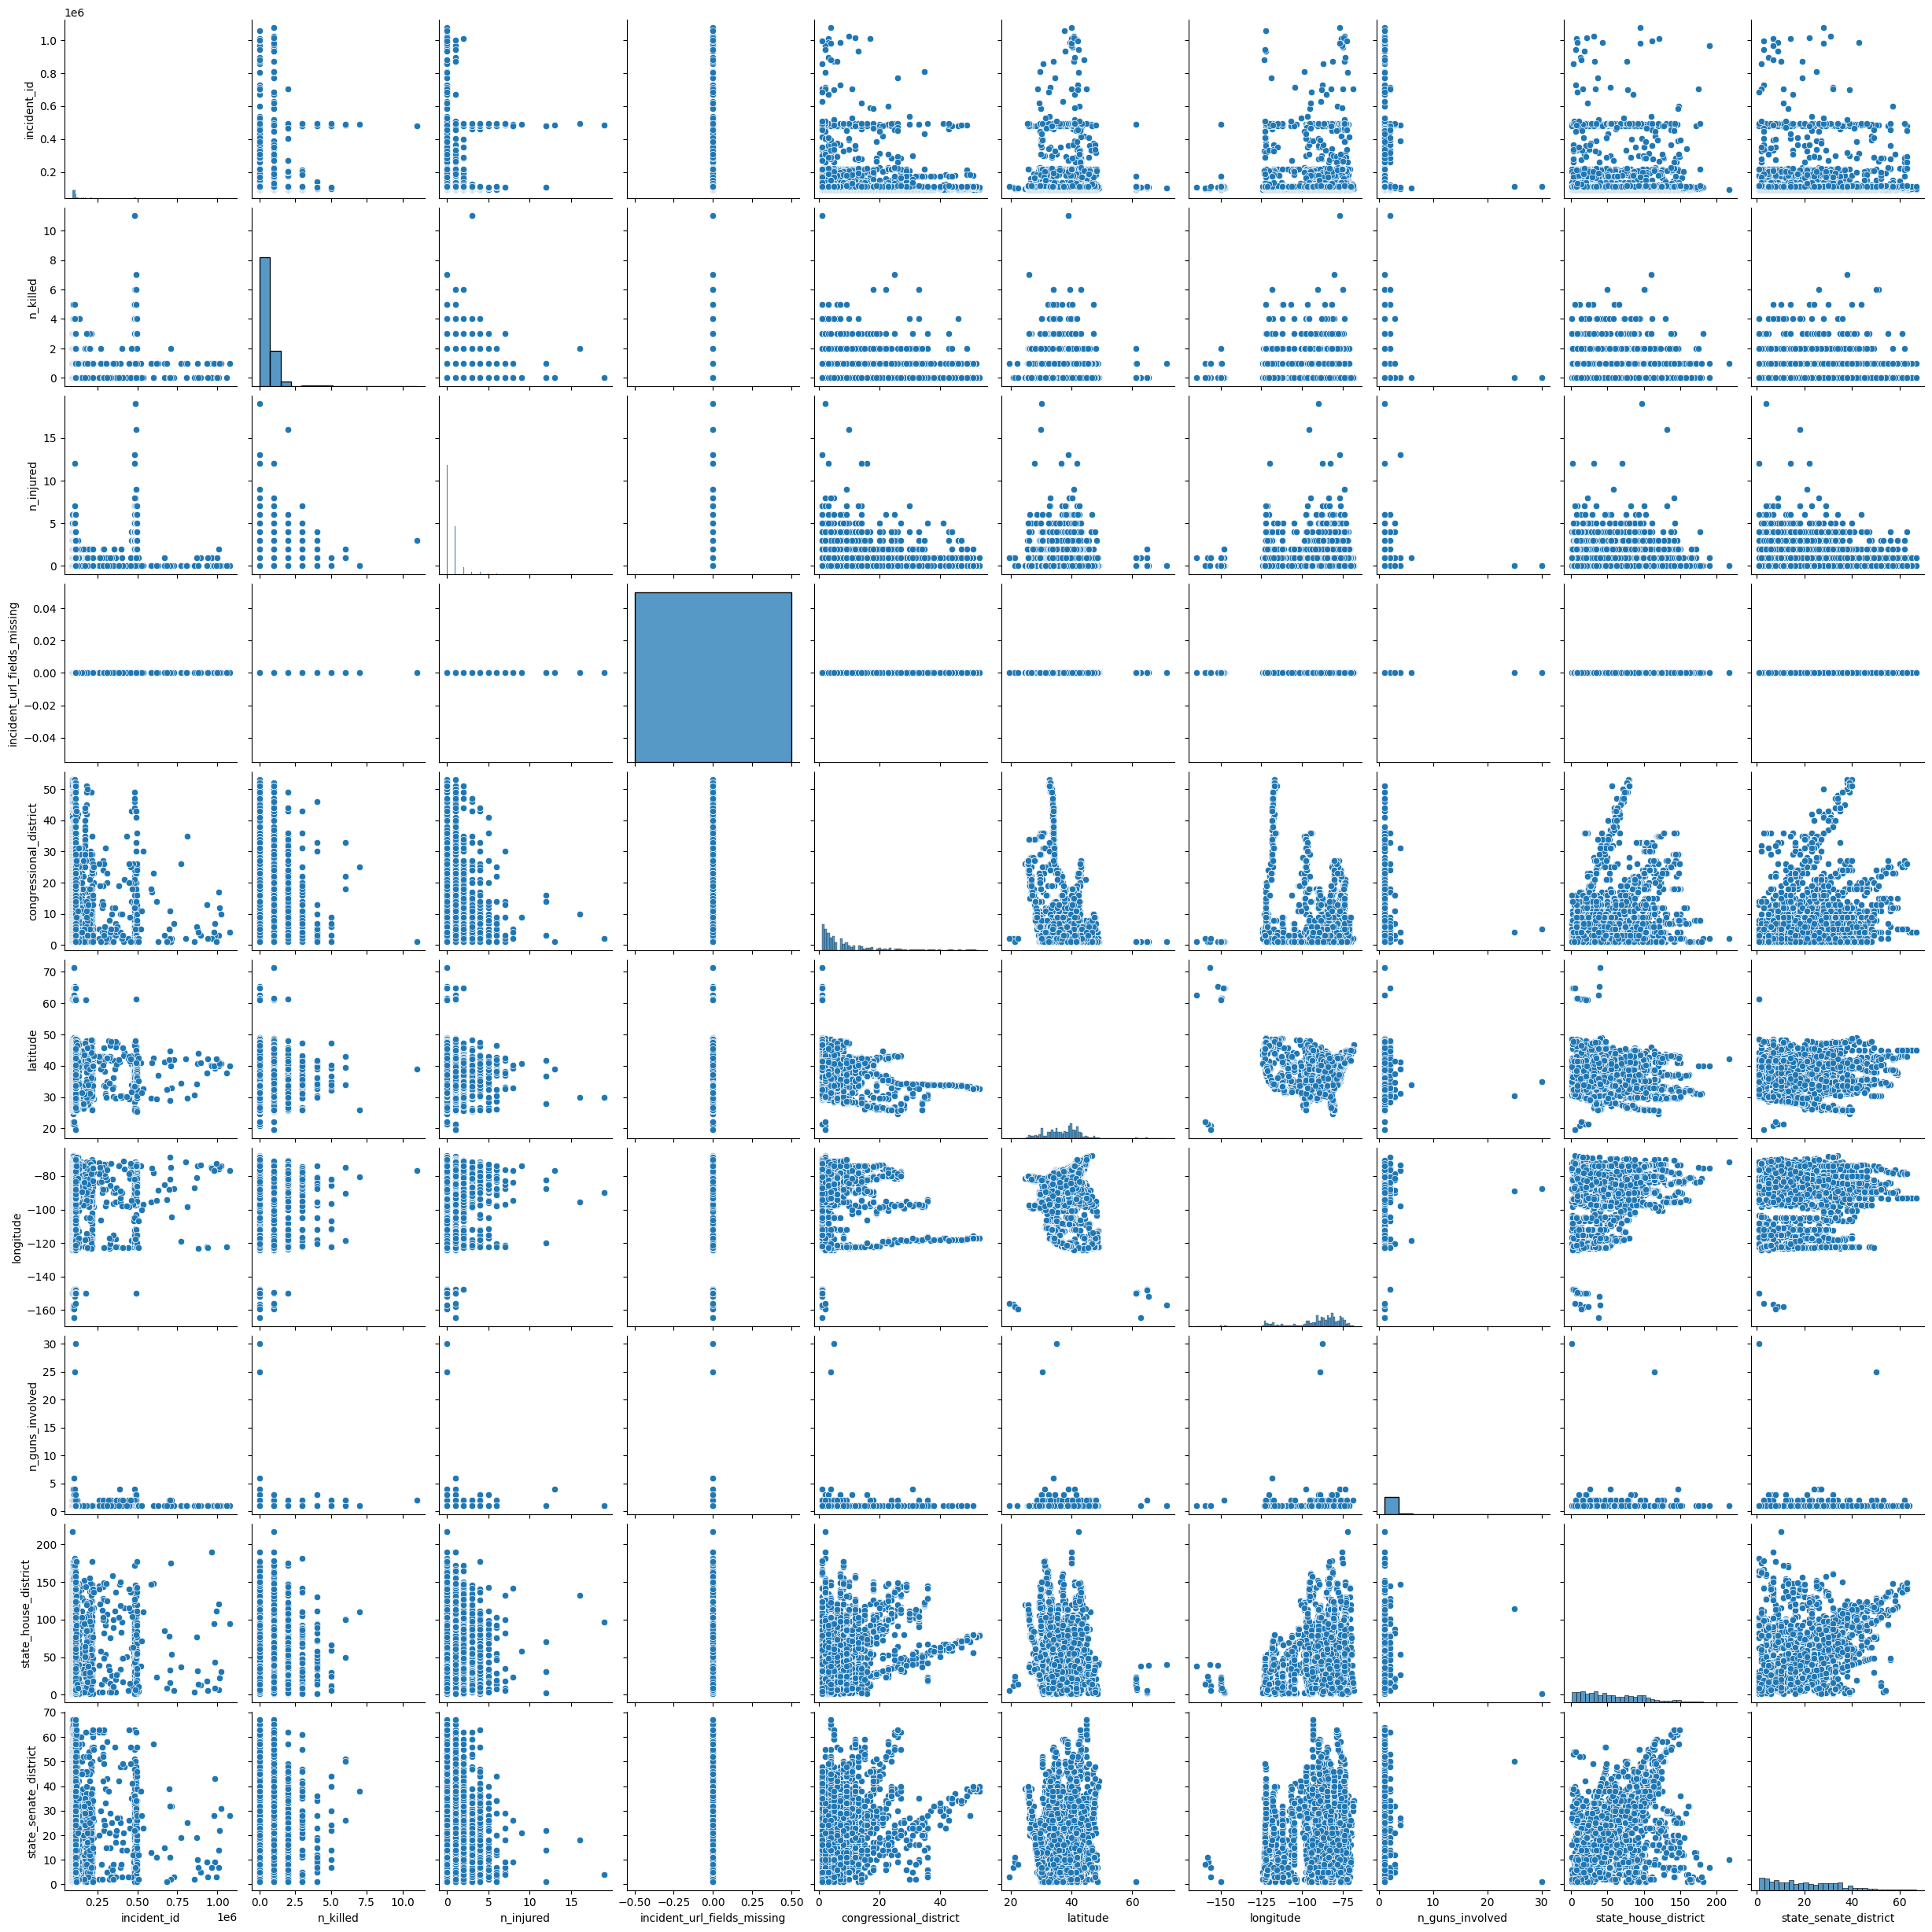

In [ ]:
sns.pairplot(dataframe)

## **1.1 A little bit of Data cleaning: replacing blank boxes and NaN values.**

In [8]:
daaframe = dataframe.replace(r'^\s*$', np.nan, regex=True)
dataframe = dataframe.replace(np.nan, 0)
dataframe.head()

incident_id        date           state city_or_county  \
0       461105  2013-01-01    Pennsylvania     Mckeesport   
1       460726  2013-01-01      California      Hawthorne   
2       478855  2013-01-01            Ohio         Lorain   
3       478925  2013-01-05        Colorado         Aurora   
4       478959  2013-01-07  North Carolina     Greensboro   

                                     address  n_killed  n_injured  \
0  1506 Versailles Avenue and Coursin Street         0          4   
1               13500 block of Cerise Avenue         1          3   
2                      1776 East 28th Street         1          3   
3           16000 block of East Ithaca Place         4          0   
4                  307 Mourning Dove Terrace         2          2   

                                        incident_url  \
0  http://www.gunviolencearchive.org/incident/461105   
1  http://www.gunviolencearchive.org/incident/460726   
2  http://www.gunviolencearchive.org/incident/478855   
3  http://www.gunviolencearchive.org/incident/478925   
4  http://www.gunviolencearchive.org/incident/478959   

                                          source_url  \
0  http://www.post-gazette.com/local/south/2013/0...   
1  http://www.dailybulletin.com/article/zz/201301...   
2  http://chronicle.northcoastnow.com/2013/02/14/...   
3  http://www.dailydemocrat.com/20130106/aurora-s...   
4  http://www.journalnow.com/news/local/article_d...   

   incident_url_fields_missing  ...                    participant_age  \
0                        False  ...                              0::20   
1                        False  ...                              0::20   
2                        False  ...  0::25||1::31||2::33||3::34||4::33   
3                        False  ...         0::29||1::33||2::56||3::33   
4                        False  ...         0::18||1::46||2::14||3::47   

                               participant_age_group  \
0  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
1  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
2  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
3  0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...   
4  0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...   

                            participant_gender  \
0         0::Male||1::Male||3::Male||4::Female   
1                                      0::Male   
2  0::Male||1::Male||2::Male||3::Male||4::Male   
3         0::Female||1::Male||2::Male||3::Male   
4       0::Female||1::Male||2::Male||3::Female   

                                    participant_name  \
0                                     0::Julian Sims   
1                                  0::Bernard Gillis   
2  0::Damien Bell||1::Desmen Noble||2::Herman Sea...   
3  0::Stacie Philbrook||1::Christopher Ratliffe||...   
4  0::Danielle Imani Jameison||1::Maurice Eugene ...   

   participant_relationship  \
0                         0   
1                         0   
2                         0   
3                         0   
4                 3::Family   

                                  participant_status  \
0  0::Arrested||1::Injured||2::Injured||3::Injure...   
1      0::Killed||1::Injured||2::Injured||3::Injured   
2  0::Injured, Unharmed, Arrested||1::Unharmed, A...   
3         0::Killed||1::Killed||2::Killed||3::Killed   
4       0::Injured||1::Injured||2::Killed||3::Killed   

                                    participant_type  \
0  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
1  0::Victim||1::Victim||2::Victim||3::Victim||4:...   
2  0::Subject-Suspect||1::Subject-Suspect||2::Vic...   
3  0::Victim||1::Victim||2::Victim||3::Subject-Su...   
4  0::Victim||1::Victim||2::Victim||3::Subject-Su...   

                                             sources state_house_district  \
0  http://pittsburgh.cbslocal.com/2013/01/01/4-pe...                  0.0   
1  http://losangeles.cbslocal.com/2013/01/01/man-...                 62.0   
2  http://www.morningjournal.com/ge

## **2. More detailed analysis of self chosen data.**

**Getting to know the columns, and choosing data for analysis.**

In [9]:
columns = dataframe.columns
columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

## **2.1 Number of people killed by state**

**Matplotlib histogram**

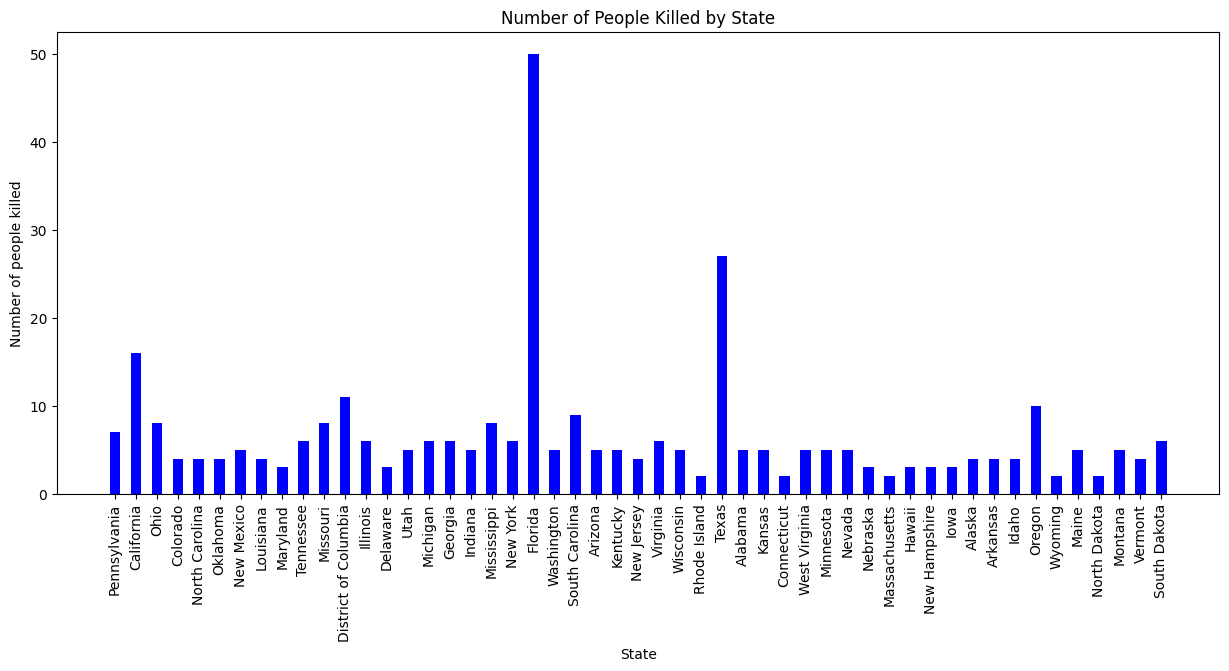

In [10]:
states = dataframe['state']
num_killed = dataframe['n_killed']

mplt.figure(figsize=(15, 6))
mplt.bar(states, num_killed, color='blue', width=0.5)
mplt.xticks(rotation=90)
mplt.xlabel('State')
mplt.ylabel('Number of people killed')
mplt.title('Number of People Killed by State')
mplt.show()

**Plotly histogram**

In [11]:
# Group data by state and sum the number of people killed
number_of_people_killed_by_state = dataframe.groupby('state')['n_killed'].sum().reset_index()

# Create the histogram
fig = px.histogram(number_of_people_killed_by_state,
                   x='state',
                   y='n_killed',
                   title='Number of People Killed by State')

# Customize the layout for better readability
fig.update_layout(
    xaxis_title='State',
    yaxis_title='Number of People Killed',
    xaxis={'categoryorder':'total descending'} # Order states by number of killed
)

fig.show()

## **2.2 Latitute vs n_guns_involved. We will use a scatter plot here.**

**Matplotlib scatter plot.**

Text(0, 0.5, 'Number of Guns Involved')

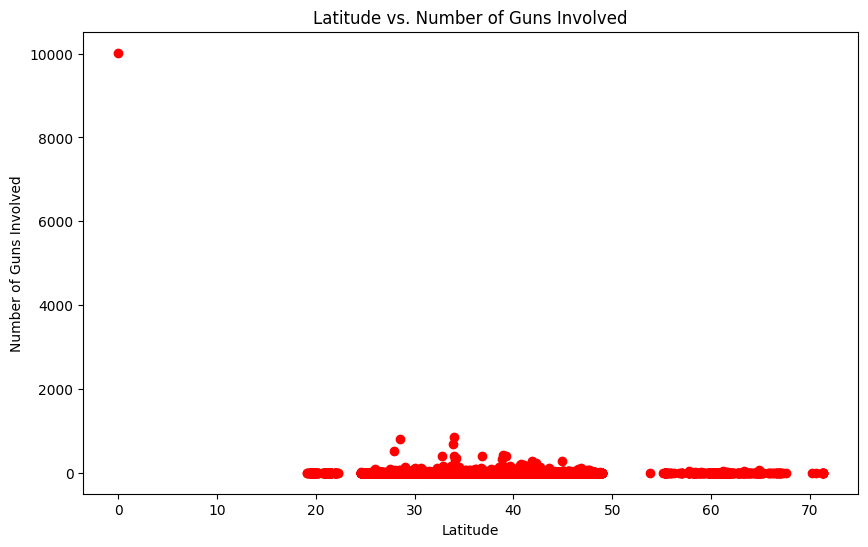

In [12]:
latitude_vs_n_guns_involved = dataframe.groupby('latitude')['n_guns_involved'].sum()

# Create the scatter plot

mplt.figure(figsize=(10, 6))  # Adjust figure size if needed
mplt.scatter(latitude_vs_n_guns_involved.index, latitude_vs_n_guns_involved.values, color = "red")
mplt.title('Latitude vs. Number of Guns Involved')
mplt.xlabel('Latitude')
mplt.ylabel('Number of Guns Involved')

**Plotly scatter plot.**

In [13]:
# Assuming 'dataframe' is your Pandas DataFrame
fig = px.scatter(dataframe, x='n_guns_involved', y='latitude',
                 title='Number of Guns Involved vs. Latitude',
                 labels={'n_guns_involved': 'Number of Guns Involved', 'latitude': 'Latitude'})
fig.show(renderer="colab")

## **3. Pie plot. Lets see what data we can use for a pie plot.**

**3.1 Number of injured by State**

**Matplotlib pie chart**

Text(0.5, 1.0, 'Number of Injured by State')

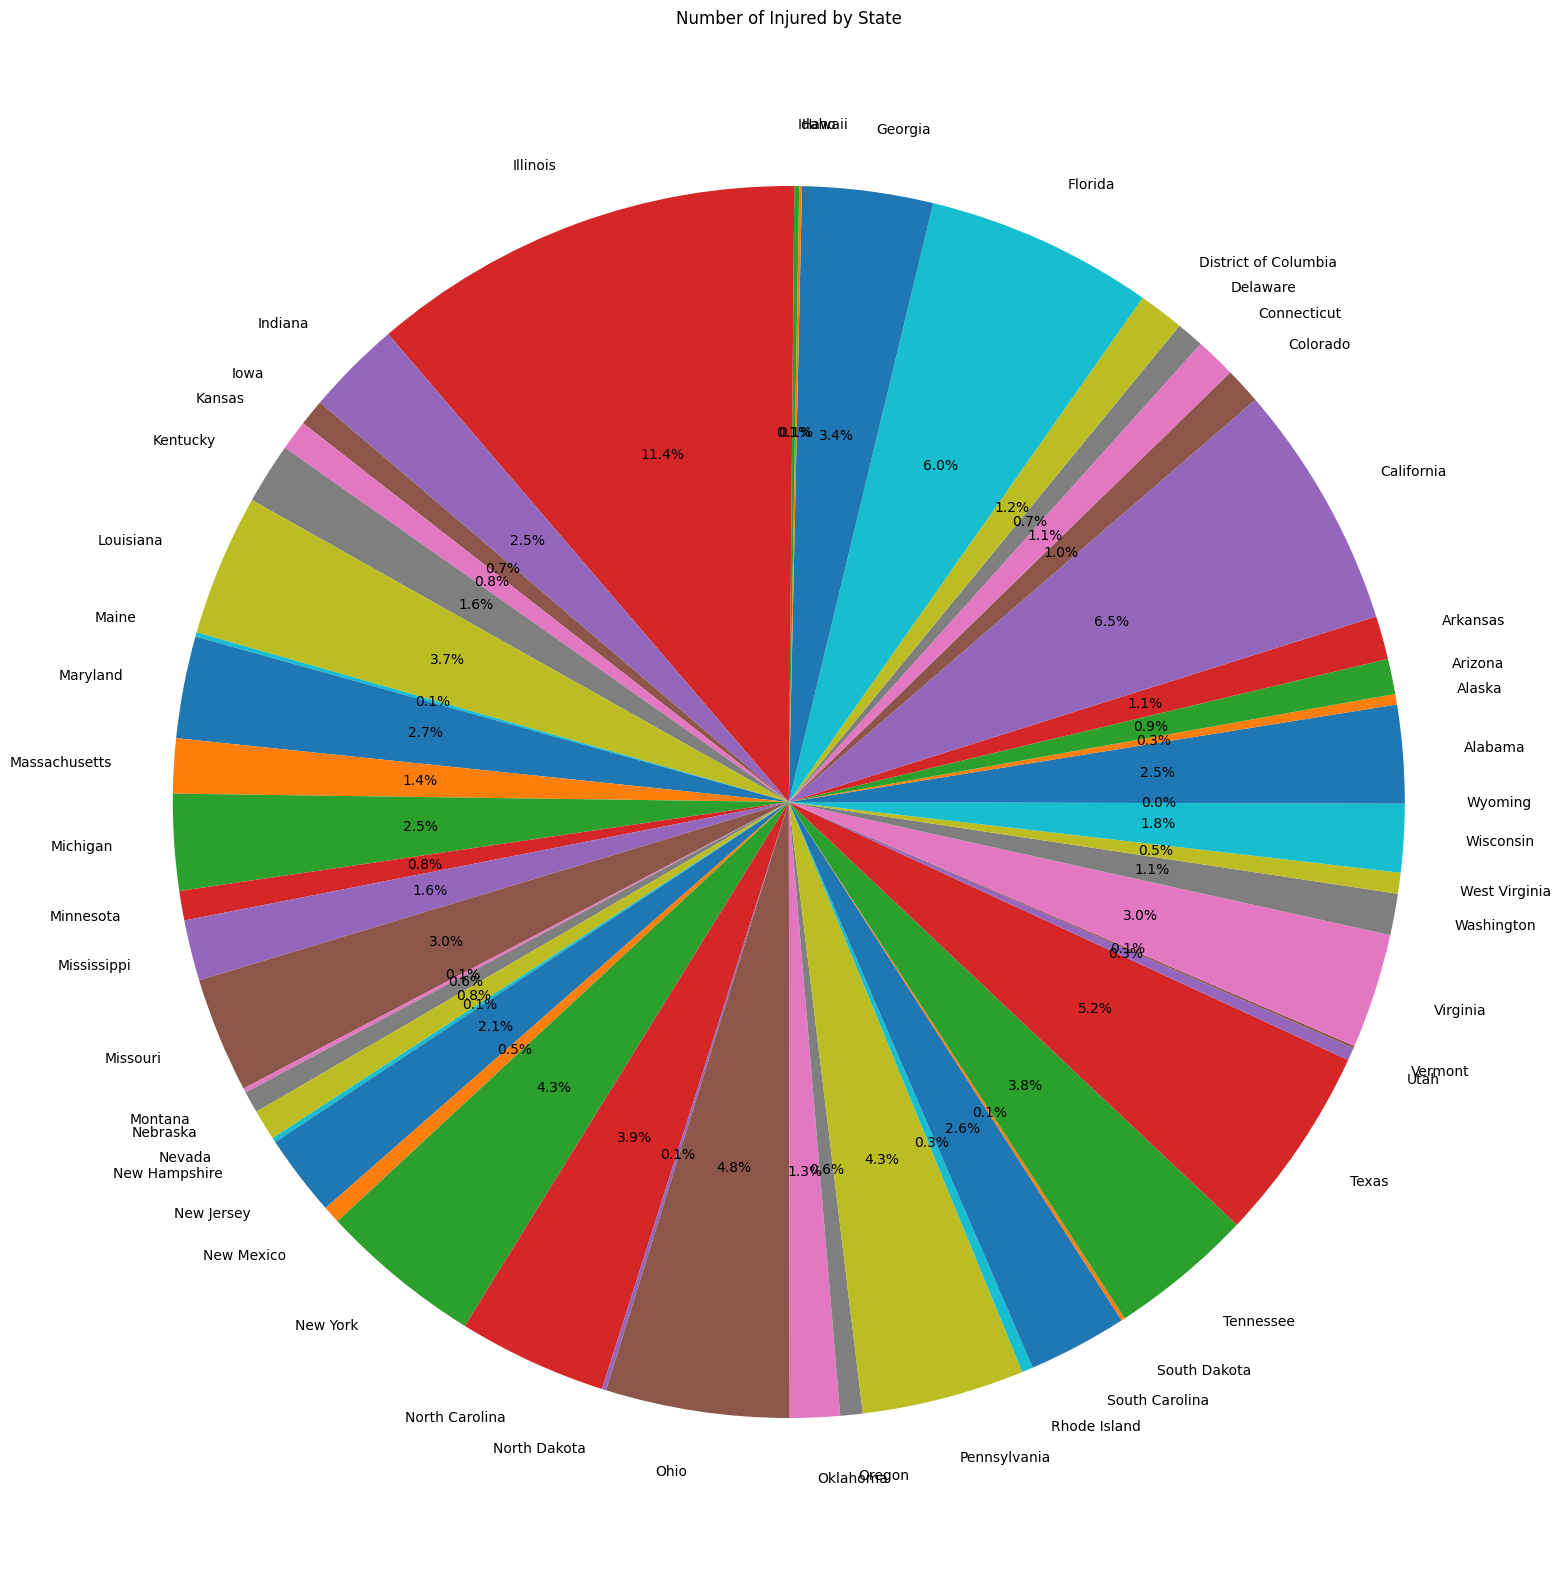

In [14]:
number_of_injured_by_state = dataframe.groupby('state')['n_injured'].sum()

# Create the pie chart

mplt.figure(figsize=(20, 20))  # Adjust figure size if
mplt.pie(number_of_injured_by_state, labels=number_of_injured_by_state.index, autopct='%1.1f%%')
mplt.title('Number of Injured by State')

**Plotly pie chart**

In [15]:
px.pie(dataframe, names='state', values='n_injured', title='Number of Injured by State', width= 1000, height=1000)

## **4. More comparison data analysis.**

**4.1 Lets compare date vs n_killed. If the number of killed people is somehow correlated with a date. For this we are going to use histograms (group by year?)**

**Matplotlib**

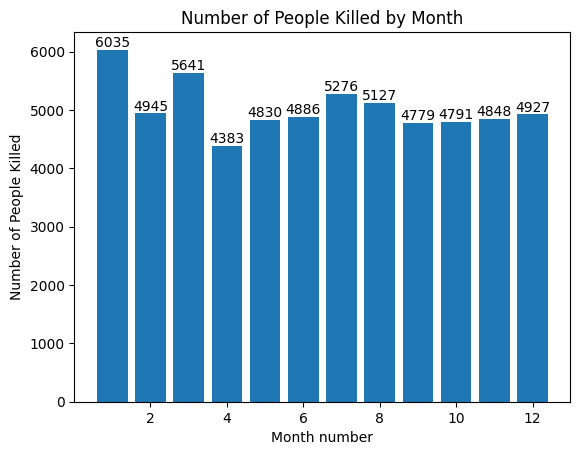

In [16]:
dataframe['year'] = pd.DatetimeIndex(dataframe['date']).month

num_of_people_killed_by_month = dataframe.groupby('year')['n_killed'].sum()

mplt.bar(num_of_people_killed_by_month.index, num_of_people_killed_by_month.values)
mplt.title('Number of People Killed by Month')
mplt.xlabel('Month number')
mplt.ylabel('Number of People Killed')

for index, value in enumerate(num_of_people_killed_by_month.values):
  mplt.text(num_of_people_killed_by_month.index[index], value, str(value), ha='center', va='bottom')

mplt.show()

**Plotly**

In [17]:
dataframe['year'] = pd.DatetimeIndex(dataframe['date']).month
num_of_people_killed_by_month = dataframe.groupby('year')['n_killed'].sum().reset_index()

# Create the bar chart
fig = px.bar(num_of_people_killed_by_month,
             x='year',
             y='n_killed',
             title='Number of People Killed by Month',
             labels={'year': 'Month Number', 'n_killed': 'Number of People Killed'})

# Add text annotations to the bars
fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()